In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import analytics as ana
import plotting as pl
import preanalysis_checks as pre

In [50]:
networkpath = "../../Networks_Dataset/networks_dataset_Mobiliti/Nov2019/for_drive/July2021"
simulation_path = "../../Results_Mobiliti/2022-05-11 - RSR Bridge Closure (more scenarios)"
links_path ="2022-05-11-sf_rsr_baseline_060_noscen_links"
legs_path ="2022-05-11-sf_rsr_baseline_060_noscen_legs"

fpath = "avg_flow_rates.tsv"
fupath = "fuel_consumption.tsv"
spath = "avg_speeds.tsv"
legs = "legs.tsv"

In [14]:
sf_links = pd.read_csv(os.path.join(networkpath,'sf_links.csv'))
sf_nodes = pd.read_csv(os.path.join(networkpath,'sf_nodes.csv'))
print(len(sf_links)), print(len(sf_nodes))

flow = ana.read_file(os.path.join(simulation_path, links_path , fpath))
speed = ana.read_file(os.path.join(simulation_path, links_path , spath))
fuel = ana.read_file(os.path.join(simulation_path, links_path, fupath))

flow = ana.results_city_len(flow,sf_links)
speed = ana.results_city_len(speed,sf_links)
fuel = ana.results_city_len(fuel,sf_links)

1008959
454651


Number of links with traffic =  1008959
---------------


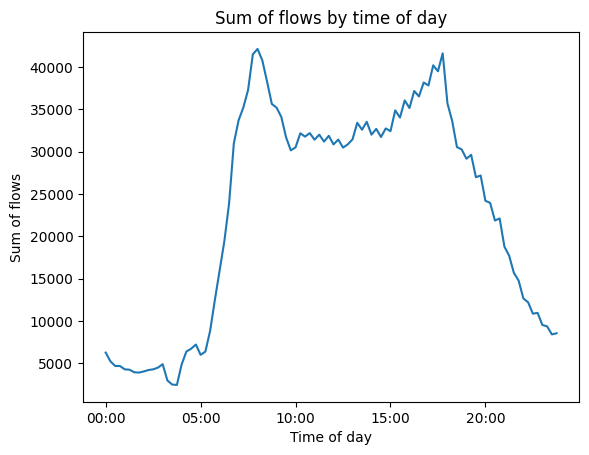

In [54]:
pre.basic_check3(flow)

In [21]:
#traffic metrics 
ana.vmt(flow),ana.vhd(flow, speed), ana.fuel_gallons(fuel)

(146545672, 224403.0, 5915111.0)

In [26]:
#traffic metrics by FC
fc = [1,2,3,4,5]
fc_metric = {}

for f in fc:
    flow_sub = flow[flow['FUNC_CLASS']==f]
    speed_sub = speed[speed['FUNC_CLASS']==f]
    fuel_sub = fuel[fuel['FUNC_CLASS']==f]
    
    fc_metric[f] = [ana.vmt(flow_sub), 
                     ana.vhd(flow_sub, speed_sub),
                     ana.fuel_gallons(fuel_sub)]
    
fc_metric 

{1: [0, 0.0, 0.0],
 2: [85050129, 144278.0, 4147613.0],
 3: [23481376, 63915.0, 732847.0],
 4: [25186282, 9891.0, 700608.0],
 5: [12827884, 6319.0, 334043.0]}

In [39]:
def plot_traff_fc(data = fc_metric, titles = 'VMT by Functional Class', metric = 0):
    for k, v in fc_metric.items():
        plt.bar(x = k, height = v[metric])
        plt.title(titles)

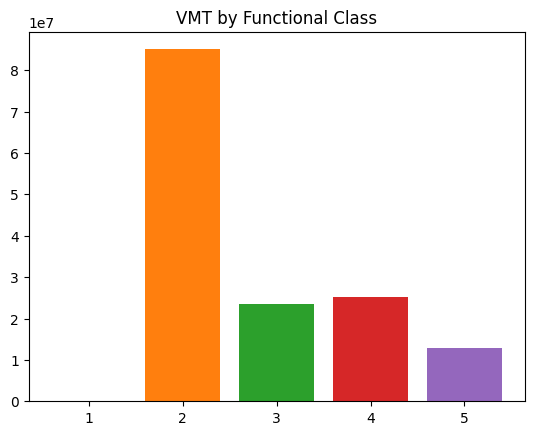

In [46]:
plot_traff_fc(data = fc_metric, titles = 'VMT by Functional Class', metric = 0)

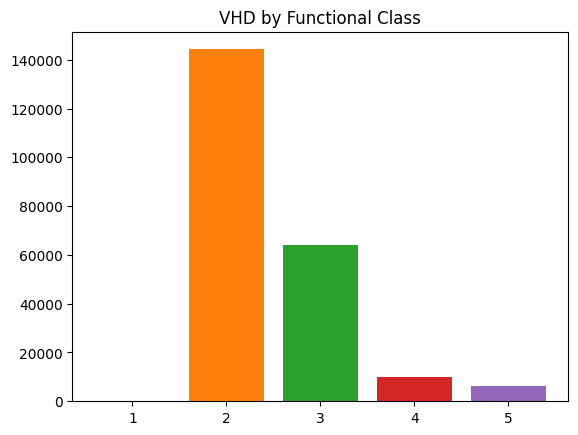

In [47]:
plot_traff_fc(data = fc_metric, titles = 'VHD by Functional Class', metric = 1)

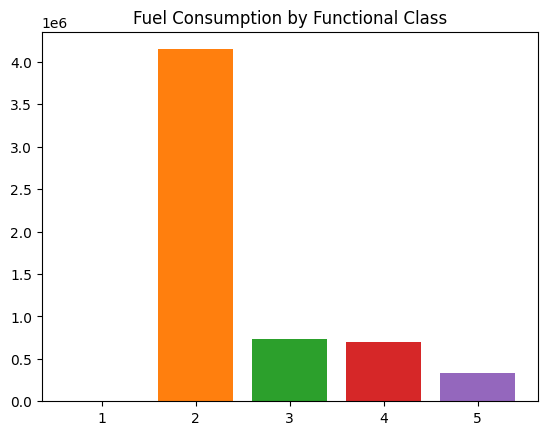

In [48]:
plot_traff_fc(data = fc_metric, titles = 'Fuel Consumption by Functional Class', metric = 2)

In [ ]:
#Legs file
legs = pd.read_csv(os.path.join(simulation_path, legs_path , legs), sep = '\t')

In [53]:
pre.basic_check1(legs)

Number of trips legs =  19167322
---------------
Trips by purpose (%) 0     28.821721
11    21.226653
1     15.986479
3      7.764423
4      7.681438
5      6.943307
7      6.207883
6      3.815953
2      0.832897
10     0.719245
Name: purpose, dtype: float64
---------------
Trips Energy category (%) 0    31.519818
1    31.495177
3    21.226653
2    15.758352
Name: energy cat., dtype: float64
---------------


 ====== Started converting to date time ======


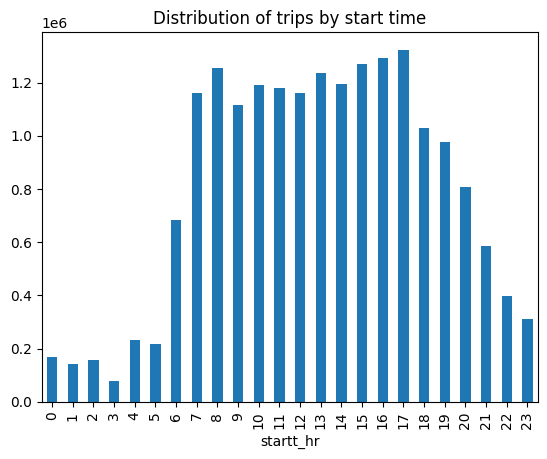

In [55]:
pre.basic_check2(legs)